In [4]:
# Binary Traffic Sign Classification
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

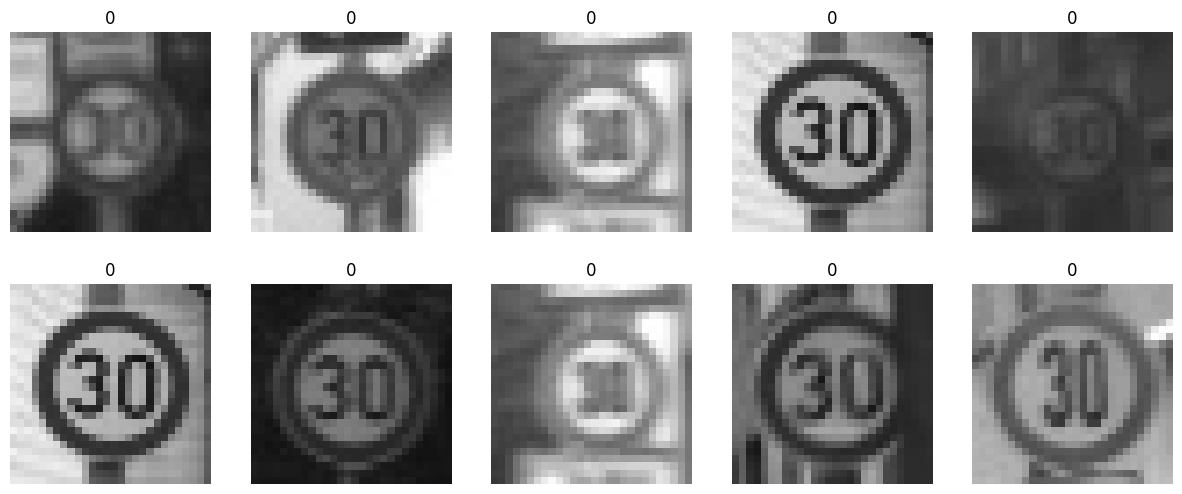

In [5]:
# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join('101'))
images_0 = [cv2.imread(os.path.join('101', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

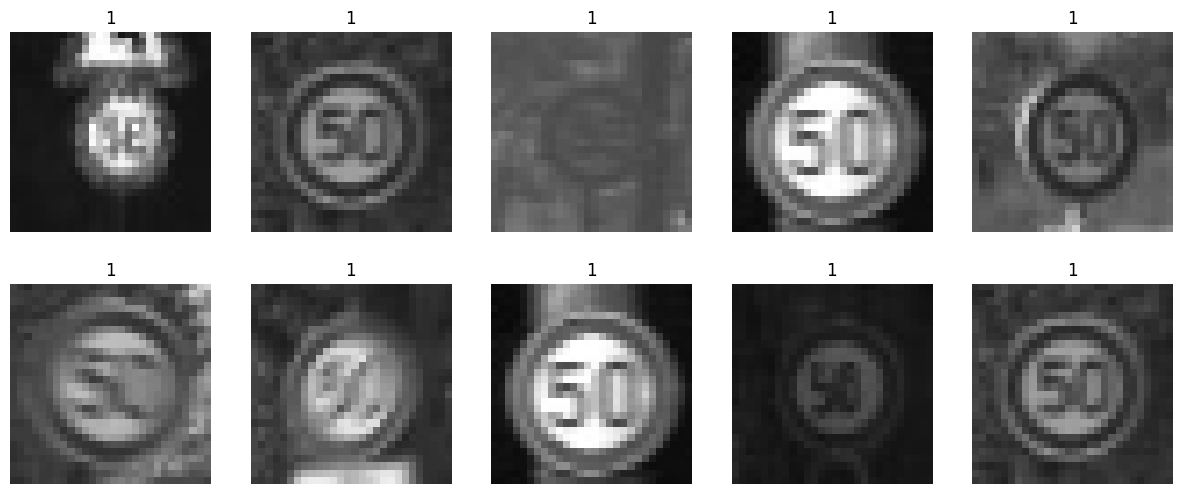

In [6]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join('102'))
images_1 = [cv2.imread(os.path.join( '102', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [7]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 20
Num samples class_1 21


In [8]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (41, 28, 28)
Labels (41,)


In [9]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.02005791664123535


In [10]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.0009450912475585938


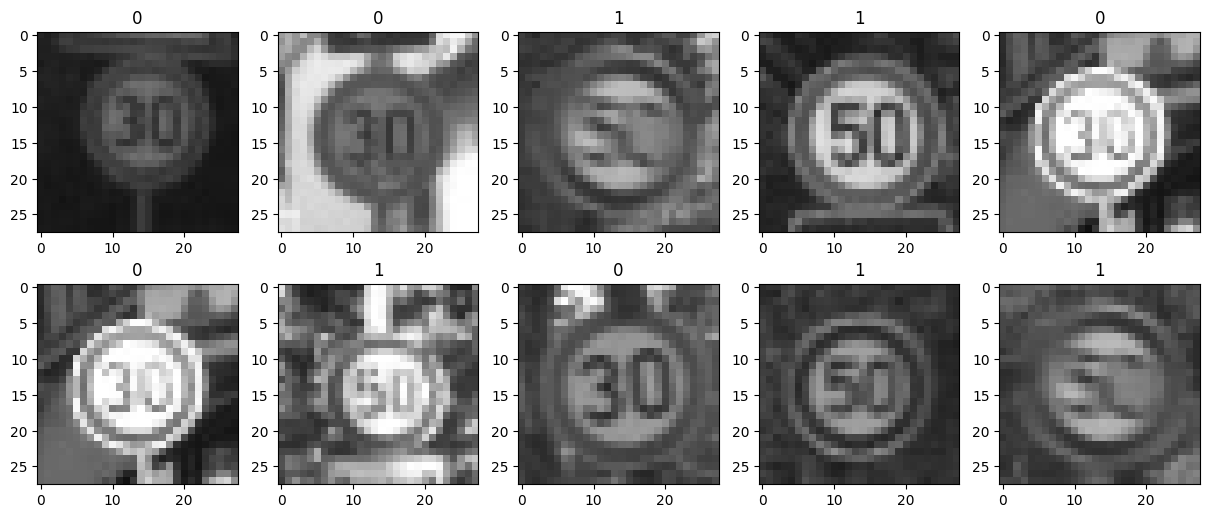

In [11]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [12]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (41, 28, 28)
Labels (41,)


In [13]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.019527912139892578


In [14]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.0024480819702148438


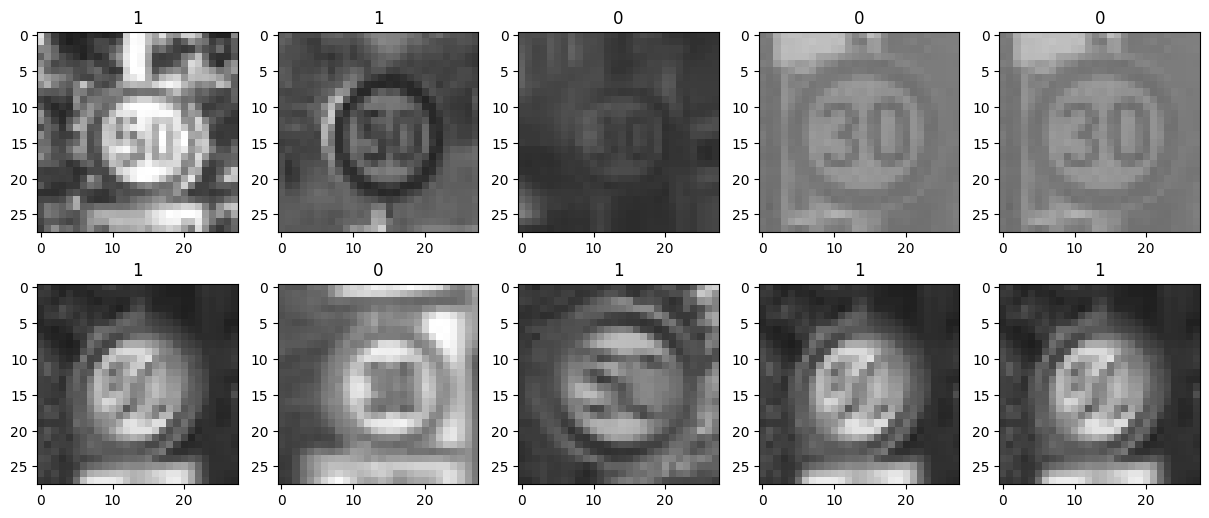

In [15]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [16]:
!pip install tensorflow

In [17]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [18]:
inputs = Input(shape=(784,))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

In [19]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [20]:
!pip install pydot

In [27]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [34]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [35]:
history = model.fit(pixels, labels, epochs=20, batch_size=42)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.8052
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4899
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3686
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3948
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4656
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4962
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4733
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4221
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3718
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3420
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3384
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3528
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3700
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3766
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3683
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

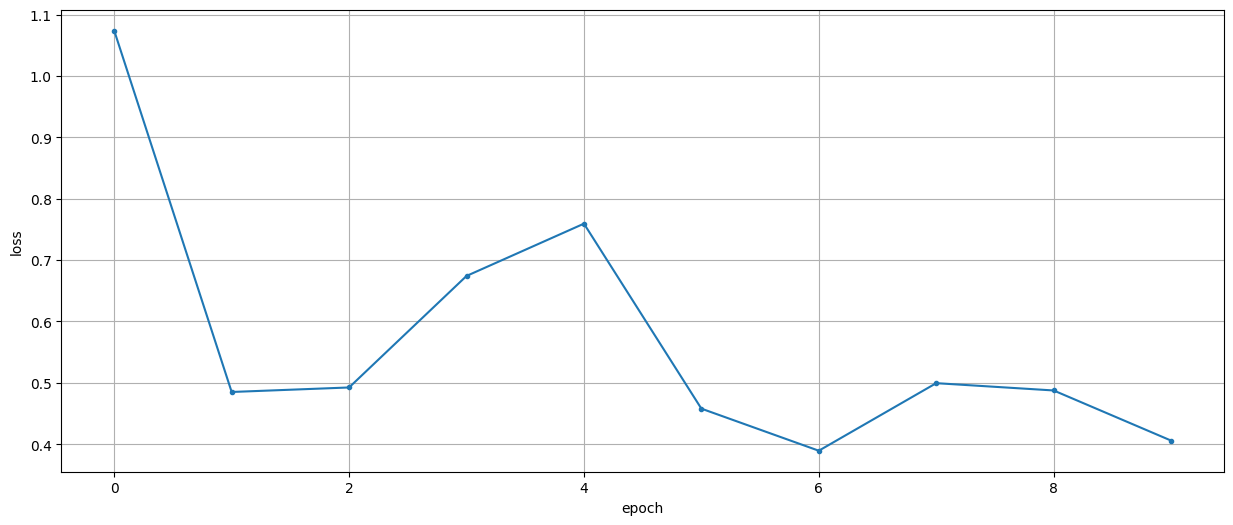

In [23]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.] [0.]


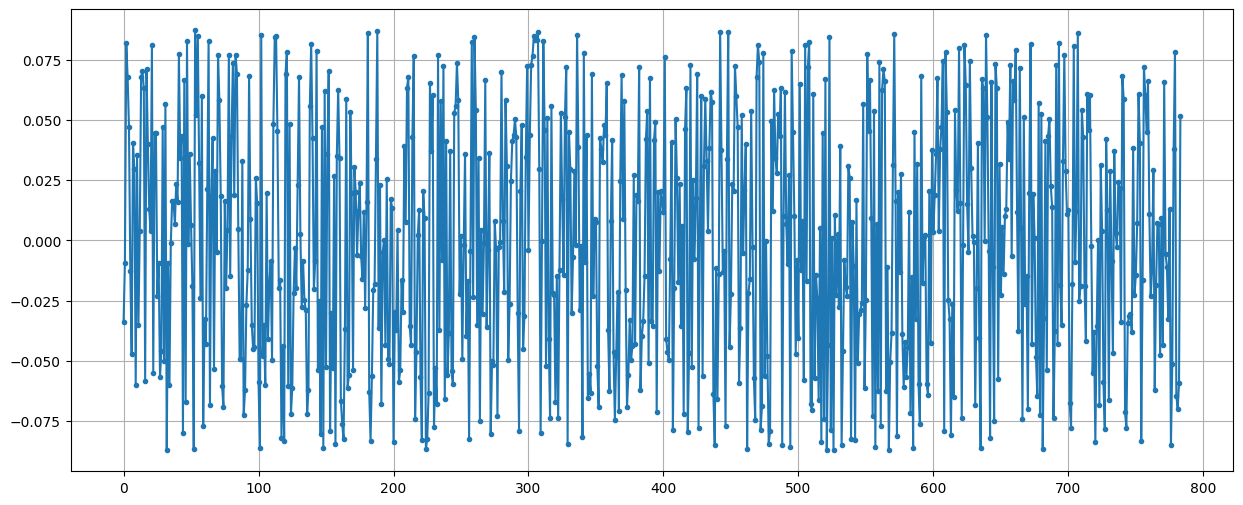

In [29]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [30]:
idx = 10
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[-0.25786695]] 1


In [31]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [32]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.4878048780487805


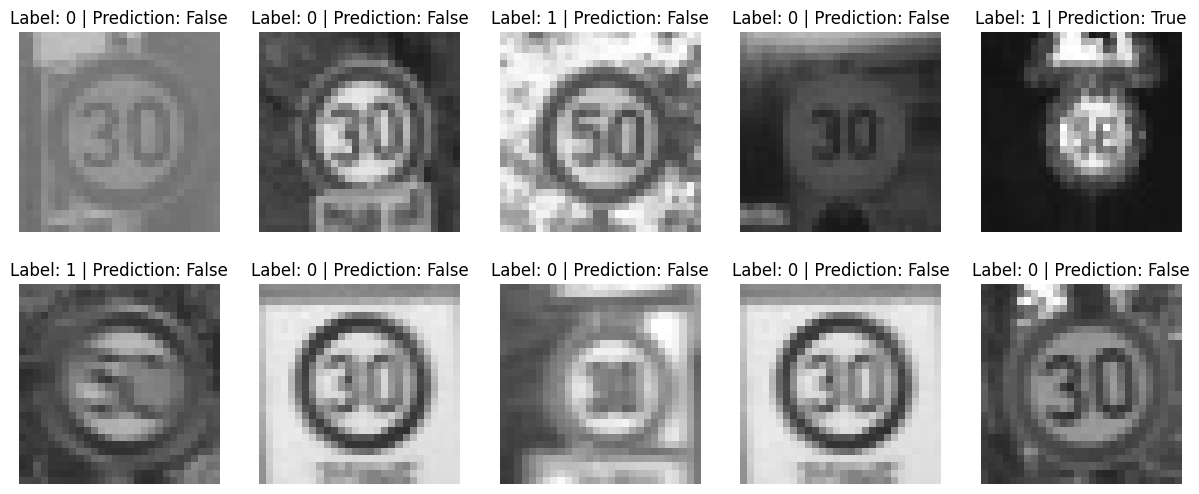

In [29]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)